In [61]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input, Lambda, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [62]:
(X_train, t_train),(X_test, t_test) = cifar10.load_data()
# floatに型変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 各画素値を 0-1 に正規化
X_train /= 255.0
X_test /= 255.0

# クラス分けの数に one-hot-vector 表現に
classes = 10
t_train = to_categorical(t_train, classes)
t_test = to_categorical(t_test, classes)


In [63]:
vgg_model = VGG16(include_top=False, weights=None, input_shape=(32,32,3))
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(10,activation='softmax')
])
adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [64]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(X_train, t_train, batch_size=128, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 12s 35ms/step - loss: 0.3309 - accuracy: 0.8823 - val_loss: 0.8556 - val_accuracy: 0.7428 ETA:  - ETA: 1s - loss: 0.3 - ETA: 0s - loss: 0.3
Epoch 2/50
352/352 [==============================] - 12s 35ms/step - loss: 0.2689 - accuracy: 0.9042 - val_loss: 0.9246 - val_accuracy: 0.7498TA: 10s - loss: 0.2778 - accuracy: 0. - ETA: 10s - loss: 0.2 - ETA: 9s - loss: 0.2688 - accura - ETA: 9s - loss: 0.267 - ETA: 8s - loss: 0.2621 - accu - ETA: 8s - loss: 0.2616 - accuracy - ETA: 7s - l - ETA: 6s - loss: 0.2600 - accura - ETA: 6s - loss: 0.2584 -  - - ETA: 4s - loss: 0.2604 - accuracy: 0. - ETA: 4s - loss: 0.2594 - accu - ETA: 3s - loss: 0.2614 - accuracy:  - ETA: 3s - loss: 0.2614 - accuracy - ETA: 3s - loss: 0 - ETA: 2s - los - ETA: 1s - loss: 0.2668 - accuracy:  - ETA: 1s - l - ETA: 0s - loss: 0.2690 - ac - ETA: 0s - loss: 0.2688 - accuracy: 0.
Epoch 3/50
352/352 [==============================] - 12s 35ms/step - loss: 0.2193 - accuracy:

352/352 [==============================] - 12s 35ms/step - loss: 0.0487 - accuracy: 0.9834 - val_loss: 1.2176 - val_accuracy: 0.7632: 10s - loss: 0.0459 - accuracy: 0.983 - ETA: 10s - - ETA: 9s - loss: 0.0419 - ac - ETA: 8s - loss: 0.0411 - accuracy - ETA: 7s - loss: 0.0 - ETA: 6s - loss: 0.0446 - accuracy - ETA: 6s - loss: 0.044 - ETA: 5s - loss: 0.0440 - accu - ETA: 4s - loss: 0 - ETA: 4s - loss: 0.0439 - accura - ETA: 3s - loss: 0.0454 - accuracy:  - ETA: 3s - ETA: 2s - loss: 0.0473 - accuracy: 0.98 - ETA: 2s - loss:
Epoch 22/50
352/352 [==============================] - 12s 35ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 1.2468 - val_accuracy: 0.7614 - loss: 0.0 - ETA: 4s - loss: 0.0341 - accuracy - ETA: 4s - loss: 0.0345 - accura - ETA: 3s - loss: 0.0345 - accura - ETA: 3s - loss: 0.0347 - accuracy:  - ETA: 3s - los - ETA: 2s - loss: 0.0364 - accura - ETA: 2s - loss: 0.0373 - ac - ETA:  - ETA: 0s - loss: 0.0390 - accu
Epoch 23/50
352/352 [==============================] - 

352/352 [==============================] - 12s 35ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 1.4124 - val_accuracy: 0.7748TA: 10s - loss: 0.0487 - - ETA: 9s - loss: 0.0493  - ETA: 9s - loss: 0.0438 - accu - ETA: 8s - loss: 0.0406 - ac - ETA: 8s - loss: 0.0 - ETA: 6s - loss: 0.0334 - accura - E - ETA: 2s - loss: 0.0286 - accura - ETA: 2s - loss: 0.0285 - accura - ETA: 2s - los - ETA: 1s - - ETA: 0s - loss: 0.0282 - accuracy
Epoch 42/50
352/352 [==============================] - 12s 35ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 1.2252 - val_accuracy: 0.7788s: 0.0278 - accuracy:  - ETA: 3s - loss: 0 - ETA:  - ETA: 1s - loss: - ETA: 0s - loss: 0.0303 - accura - ETA: 0s - loss: 0.0302 - accuracy: 0.
Epoch 43/50
352/352 [==============================] - 12s 35ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 1.2359 - val_accuracy: 0.7758s: 0.0267 - - ETA: 9s - loss: 0.0290  - ETA: 8s - loss: 0.0284 - accuracy - ETA: 8s - los - ETA: 7s - loss: 0.0 - ETA: 6s - loss: 0.

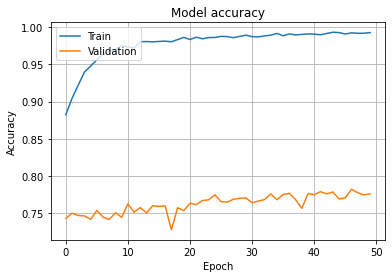

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [73]:
vgg_pretrain_model = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))
vgg_pretrain_model.trainable = False
pretrain_model = Sequential([
    vgg_pretrain_model,
    Flatten(),
    Dense(10,activation='softmax')
])
adam = optimizers.Adam(lr=1e-4)
pretrain_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [74]:
pretrain_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [75]:
history2 = pretrain_model.fit(X_train, t_train, batch_size=128, epochs=50, verbose=1, validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 4s 12ms/step - loss: 2.1763 - accuracy: 0.2127 - val_loss: 2.0240 - val_accuracy: 0.3164
Epoch 2/50
352/352 [==============================] - 4s 11ms/step - loss: 1.9479 - accuracy: 0.3504 - val_loss: 1.8507 - val_accuracy: 0.4004
Epoch 3/50
352/352 [==============================] - 4s 11ms/step - loss: 1.8119 - accuracy: 0.4067 - val_loss: 1.7418 - val_accuracy: 0.4404
Epoch 4/50
352/352 [==============================] - 4s 11ms/step - loss: 1.7218 - accuracy: 0.4367 - val_loss: 1.6665 - val_accuracy: 0.4596
Epoch 5/50
352/352 [==============================] - 4s 11ms/step - loss: 1.6572 - accuracy: 0.4556 - val_loss: 1.6112 - val_accuracy: 0.4770
Epoch 6/50
352/352 [==============================] - 4s 11ms/step - loss: 1.6085 - accuracy: 0.4690 - val_loss: 1.5691 - val_accuracy: 0.4862
Epoch 7/50
352/352 [==============================] - 4s 11ms/step - loss: 1.5699 - accuracy: 0.4794 - val_loss: 1.5343 - val_accuracy: 0.4986

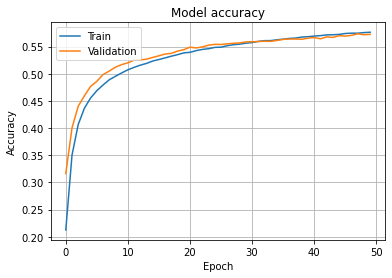

In [76]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()